In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv("weather_history.csv", low_memory=False, index_col="DATE")
weather

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,AWND,...,WT07,WT07_ATTRIBUTES,WT08,WT08_ATTRIBUTES,WT09,WT09_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,X",NaN,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,",,0",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-16,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,15.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-17,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,15.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-04-18,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",37.7178,-122.23301,1.5,NaN,NaN,NaN,NaN,11.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION            0.000000
NAME               0.000000
LATITUDE           0.000000
LONGITUDE          0.000000
ELEVATION          0.000000
                     ...   
WT09_ATTRIBUTES    0.999884
WT16               0.887040
WT16_ATTRIBUTES    0.887040
WT18               0.999827
WT18_ATTRIBUTES    0.999827
Length: 71, dtype: float64

In [4]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2023-04-16,0.0,NaN,NaN,60.0,48.0
2023-04-17,0.0,NaN,NaN,59.0,50.0
2023-04-18,0.0,NaN,NaN,59.0,46.0


In [5]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.016294
snow          0.342463
snow_depth    0.335298
temp_max      0.000636
temp_min      0.000809
dtype: float64

In [6]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [7]:
del core_weather["snow"]
del core_weather["snow_depth"]
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2023-04-16,0.0,60.0,48.0
2023-04-17,0.0,59.0,50.0
2023-04-18,0.0,59.0,46.0


In [8]:
core_weather["precip"].value_counts()

0.00    14035
0.01      443
0.02      202
0.03      123
0.04      105
        ...  
1.05        1
1.38        1
1.95        1
2.01        1
1.28        1
Name: precip, Length: 179, dtype: int64

In [9]:
core_weather

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2023-04-16,0.0,60.0,48.0
2023-04-17,0.0,59.0,50.0
2023-04-18,0.0,59.0,46.0


In [10]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0
2016-05-08,NaN,67.0,56.0


In [11]:
core_weather["1983-10-19":"1983-11-29"]

,precip,temp_max,temp_min
DATE,,,
1983-10-19,0.00,69.0,52.0
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0


In [12]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [13]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2013-06-16,0.0,NaN,NaN
2019-04-18,0.0,NaN,50.0
2019-04-21,0.0,NaN,52.0
2019-04-22,0.0,NaN,50.0
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN
2020-09-09,0.0,NaN,NaN
2021-10-31,0.0,NaN,56.0


In [14]:
core_weather["temp_min"] = core_weather["temp_min"].fillna(method="ffill")
core_weather["temp_max"] = core_weather["temp_max"].fillna(method="ffill")

In [15]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [16]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [17]:
core_weather.index = pd.to_datetime(core_weather.index)

<AxesSubplot:xlabel='DATE'>

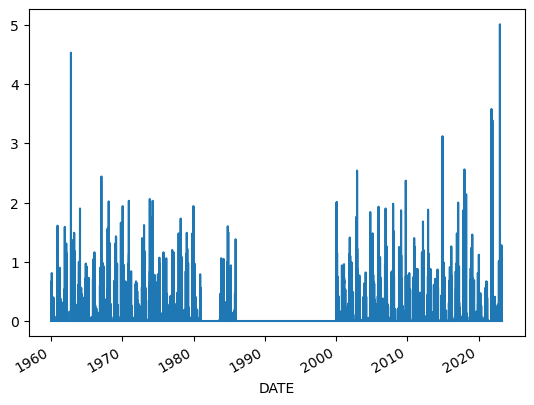

In [22]:
core_weather["precip"].plot()

<AxesSubplot:xlabel='DATE'>

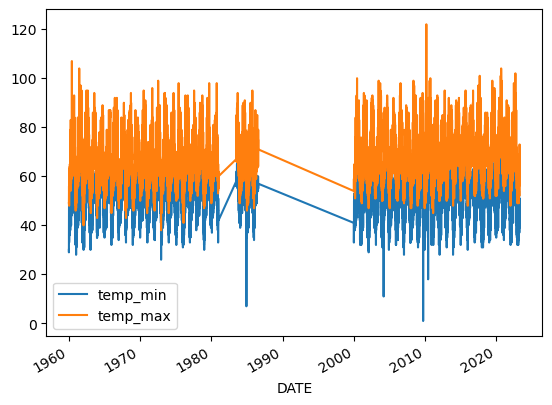

In [23]:
core_weather[["temp_min", "temp_max"]].plot()

In [30]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    110
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

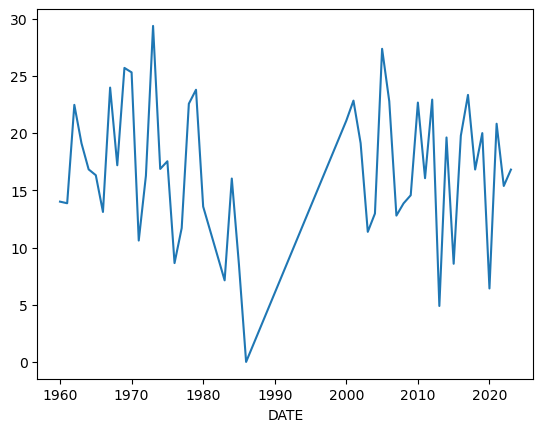

In [35]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [38]:
core_weather.groupby(core_weather.index.year).sum()

,precip,temp_max,temp_min
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


In [41]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2023-04-16,0.0,60.0,48.0,59.0
2023-04-17,0.0,59.0,50.0,59.0
2023-04-18,0.0,59.0,46.0,62.0


In [50]:
core_weather = core_weather.drop(core_weather[core_weather.target.isnull()].index).copy()
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2023-04-15,0.0,61.0,49.0,60.0
2023-04-16,0.0,60.0,48.0,59.0
2023-04-17,0.0,59.0,50.0,59.0


In [51]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)

In [52]:
features = ["precip", "temp_min", "temp_max"]

In [53]:
train_data, test_data = core_weather.loc[:"2020-12-31"], core_weather.loc["2021-01-01":]

In [55]:
reg.fit(train_data[features], train_data["target"])

Ridge(alpha=0.1)

In [57]:
predictions = reg.predict(test_data[features])

In [62]:
from sklearn.metrics import mean_squared_error as mse
mse(test_data.target, predictions)

19.851025446775644

In [69]:
combined = pd.concat([test_data.target, pd.Series(predictions, index=test_data.index)], axis=1)
combined.columns = ["actual","target"]
combined

,actual,target
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2023-04-15,60.0,62.144376
2023-04-16,59.0,61.243548
2023-04-17,59.0,60.881790


<AxesSubplot:xlabel='DATE'>

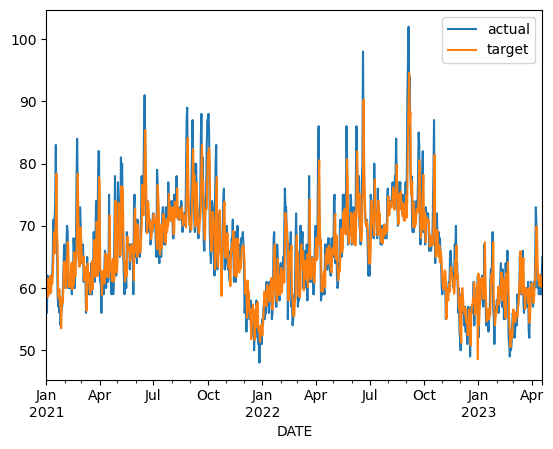

In [71]:
combined.plot()

In [74]:
reg.coef_

array([-2.20730384,  0.17969047,  0.72113834])

In [75]:
 def create_predictions(features, core_weather, reg):
    train_data, test_data = core_weather.loc[:"2020-12-31"], core_weather.loc["2021-01-01":]
    reg.fit(train_data[features], train_data["target"])
    predictions = reg.predict(test_data[features])
    error = mse(test_data.target, predictions)
    combined = pd.concat([test_data.target, pd.Series(predictions, index=test_data.index)], axis=1)
    combined.columns = ["actual","target"]
    return error, combined

In [79]:
create_predictions(features, core_weather, reg)

19.851025446775644

In [95]:
core_weather["max_min"] = (core_weather.temp_max / core_weather.temp_min).copy()
core_weather["month_max"] = (core_weather.rolling(30)["temp_max"].mean()).copy()
core_weather["month_day_max"] = (core_weather["month_max"] / core_weather["temp_max"]).copy()

In [101]:
updated_features = features + ["max_min", "month_max", "month_day_max"]

In [102]:
core_weather = core_weather.iloc[30:, :].copy()

In [104]:
updated_error, updated_combined = create_predictions(updated_features, core_weather, reg)

In [106]:
updated_combined

,actual,target
DATE,,
2021-01-01,57.0,60.497135
2021-01-02,56.0,59.007894
2021-01-03,62.0,58.229997
2021-01-04,59.0,61.762566
2021-01-05,59.0,59.795487
...,...,...
2023-04-15,60.0,61.442094
2023-04-16,59.0,60.640145
2023-04-17,59.0,60.069802


In [107]:
core_weather

,precip,temp_max,temp_min,target,max_min,month_max,month_day_max
DATE,,,,,,,
1960-03-01,0.00,55.0,43.0,58.0,1.279070,59.866667,1.088485
1960-03-02,0.00,58.0,40.0,62.0,1.450000,59.733333,1.029885
1960-03-03,0.00,62.0,47.0,62.0,1.319149,59.833333,0.965054
1960-03-04,0.00,62.0,52.0,58.0,1.192308,59.933333,0.966667
1960-03-05,0.13,58.0,54.0,59.0,1.074074,59.866667,1.032184
...,...,...,...,...,...,...,...
2023-04-15,0.00,61.0,49.0,60.0,1.244898,60.033333,0.984153
2023-04-16,0.00,60.0,48.0,59.0,1.250000,59.900000,0.998333
2023-04-17,0.00,59.0,50.0,59.0,1.180000,59.666667,1.011299


In [108]:
reg.coef_

array([ -1.42084152,   0.08865753,   0.38741636,   0.10117702,
         0.49107966, -18.39976112])

In [116]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [118]:
error_3, combined_3 = create_predictions(features + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error_3

18.616349393702105

In [127]:
core_weather.corr().target

precip            -0.204104
temp_max           0.822294
temp_min           0.596598
target             1.000000
max_min            0.044859
month_max          0.688103
month_day_max     -0.421414
monthly_avg        0.690831
day_of_year_avg    0.712677
Name: target, dtype: float64

In [120]:
combined_3["diff"] = (combined_3.target - combined_3.actual).abs()
combined_3

,actual,target,diff
DATE,,,
2021-01-01,57.0,59.040473,2.040473
2021-01-02,56.0,57.387240,1.387240
2021-01-03,62.0,56.837136,5.162864
2021-01-04,59.0,60.236301,1.236301
2021-01-05,59.0,58.504210,0.495790
...,...,...,...
2023-04-15,60.0,62.523873,2.523873
2023-04-16,59.0,61.792259,2.792259
2023-04-17,59.0,61.201874,2.201874


<AxesSubplot:xlabel='DATE'>

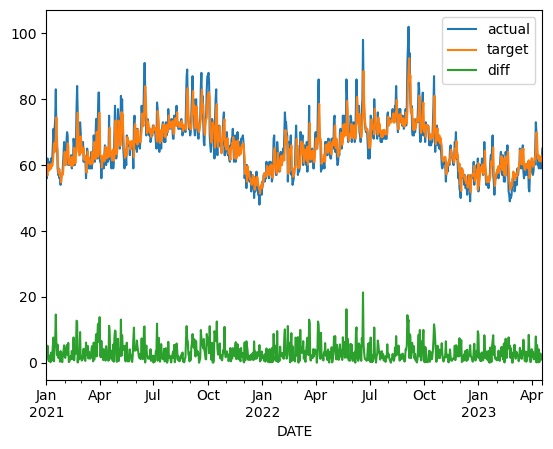

In [125]:
combined_3.plot()